# Linear Regression

**Goal**: Linear regression models the relationship between a scalar dependent variable $y$ and one or more independent variables $x_1, x_2, ..., x_p$ by fitting a linear equation.

**Use Cases**:
- Risk modeling and forecasting in finance
- Predictive modeling in economics
- Interpretable baseline in ML pipelines
- Pricing models, asset returns, trade volume prediction

**Core Formula**:
$$ y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_p x_p + \varepsilon $$

**Key Concepts**:
- Model formulation and assumptions
- Normal equation, loss function
- Residual analysis, goodness-of-fit ($R^2$)
- Overfitting, multicollinearity, regularization
- Statistical inference: confidence intervals, hypothesis testing


## 1. Problem Setup: What is Linear Regression?

Linear regression models how a **continuous dependent variable** $y$ changes with one or more **independent variables** $x_1, x_2, ..., x_p$. The model assumes a linear relationship:

$$
y_i = \beta_0 + \sum_{j=1}^{p} \beta_j x_{ij} + \varepsilon_i
$$

where:
- $y_i$ is the $i$-th observed outcome
- $x_{ij}$ is the $j$-th feature for sample $i$
- $\beta_j$ are model parameters (coefficients)
- $\varepsilon_i$ is the error (residual)

### Matrix Form:

Let $X \in \mathbb{R}^{n \times (p+1)}$ be the design matrix with a leading column of 1s (intercept), and $y \in \mathbb{R}^{n}$ be the output vector.

Then:
$$
\hat{y} = X \beta \quad \text{and} \quad \beta = (X^\top X)^{-1} X^\top y
$$

This is known as the **normal equation**.

---

### 📊 Example Dataset

Let’s assume the following:

- $x_1$: Daily trade volume (in millions)
- $x_2$: Volatility index (VIX score)
- $x_3$: Previous day's return
- $y$: Current day's return

Then:
$$
X =
\begin{bmatrix}
1 & 5.1 & 21.0 & 0.012 \\
1 & 6.3 & 18.2 & -0.008 \\
1 & 4.9 & 23.1 & 0.015 \\
\vdots & \vdots & \vdots & \vdots \\
\end{bmatrix}
\quad
y =
\begin{bmatrix}
0.011 \\
0.005 \\
-0.003 \\
\vdots
\end{bmatrix}
$$


## 2. Least Squares Loss – Derivation and Why "Squares"?

### Objective:
Given data $X \in \mathbb{R}^{n \times (p+1)}$ and $y \in \mathbb{R}^n$, we want to find $\beta$ that minimizes the total squared error:

$$
\mathcal{L}(\beta) = \sum_{i=1}^{n} (y_i - x_i^\top \beta)^2 = \| y - X \beta \|^2
$$

This is called the **Ordinary Least Squares (OLS)** criterion.

### Why Squares?
1. **Mathematically Convenient**:
   - Squared error is differentiable and convex.
   - Leads to a closed-form solution via calculus.

2. **Symmetric Treatment of Over/Underestimates**:
   - Squaring penalizes both directions equally: $(+1)^2 = (-1)^2$

3. **Emphasizes Larger Errors**:
   - Amplifies large deviations (e.g., outliers)

4. **Connection to Maximum Likelihood**:
   If we assume:
   - $y_i = x_i^\top \beta + \varepsilon_i$ with $\varepsilon_i \sim \mathcal{N}(0, \sigma^2)$ (i.i.d. Gaussian noise)

   Then the **likelihood** of $y$ given $X, \beta$ is:
   $$
   p(y | X, \beta) = \prod_{i=1}^{n} \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left( -\frac{(y_i - x_i^\top \beta)^2}{2\sigma^2} \right)
   $$

   Taking the **log-likelihood**:
   $$
   \log p(y | X, \beta) = -\frac{n}{2} \log(2\pi\sigma^2) - \frac{1}{2\sigma^2} \sum_{i=1}^{n} (y_i - x_i^\top \beta)^2
   $$

   Maximizing the log-likelihood is equivalent to **minimizing the squared loss**, hence:
   > Least Squares = Maximum Likelihood Estimation (MLE) under Gaussian noise.

### Solution:
Differentiate the loss and solve:
$$
\frac{\partial}{\partial \beta} \| y - X \beta \|^2 = -2 X^\top (y - X \beta)
$$

Set to zero:
$$
X^\top X \beta = X^\top y \quad \Rightarrow \quad \beta = (X^\top X)^{-1} X^\top y
$$


## 3. Assumptions of Linear Regression

Linear regression relies on several assumptions. If these assumptions are violated, the estimates may be **biased**, **inefficient**, or **invalid for inference**.

### 1. Linearity
**Assumption**: The relationship between $X$ and $y$ is linear in parameters:
$$ y = X \beta + \varepsilon $$

**Violation**: Model is misspecified.
- Consequences: Biased estimates, poor predictive power.
- Remedy: Transform features, add polynomial terms, or try nonlinear models.

---

### 2. Independence of Errors
**Assumption**: Residuals $\varepsilon_i$ are independent (no autocorrelation).

**Violation**: Common in time-series data.
- Consequences: Standard errors are incorrect $\Rightarrow$ wrong inference.
- Remedy: Use models like GLS (Generalized Least Squares), or add lag variables.

---

### 3. Homoscedasticity
**Assumption**: Constant variance of residuals: $\text{Var}(\varepsilon_i) = \sigma^2$.

**Violation**: Heteroscedasticity.
- Consequences: $\beta$ remains unbiased, but standard errors are wrong.
- Remedy: Use **robust standard errors**, or weighted least squares.

---

### 4. No Multicollinearity
**Assumption**: Features are not linearly dependent.

**Violation**: High correlation among features.
- Consequences: Inflated variance of $\beta$, unstable estimates.
- Remedy: Remove/reduce correlated variables, use PCA or regularization (Ridge/Lasso).

---

### 5. Normality of Errors (for inference)
**Assumption**: $\varepsilon_i \sim \mathcal{N}(0, \sigma^2)$

**Violation**: Affects p-values, confidence intervals.
- Consequences: Inference not valid.
- Remedy: Use bootstrap or large sample approximation (CLT helps).

---

### Summary Table

| Assumption            | Affects Estimate? | Affects Inference? | Common Fix |
|----------------------|------------------|--------------------|------------|
| Linearity            | Yes              | Yes                | Add basis terms, transform |
| Independence         | No               | Yes                | Time-series models |
| Homoscedasticity     | No               | Yes                | Robust SE, WLS |
| No Multicollinearity | No               | Yes                | Ridge, PCA |
| Normality            | No               | Yes                | Bootstrap, large $n$ |


## 4. Geometric Interpretation

Let $X \in \mathbb{R}^{n \times (p+1)}$ and $y \in \mathbb{R}^n$. The goal is to project $y$ onto the **column space of $X$**.

### Projection:
The predicted vector $\hat{y}$ is the projection of $y$ onto $\text{Col}(X)$.

The projection matrix is:
$$
P = X (X^\top X)^{-1} X^\top
$$
So:
$$
\hat{y} = P y
$$

### Residual Vector:
$$
r = y - \hat{y} = (I - P) y
$$

### Key Geometric Properties:
- $\hat{y}$ lies in $\text{Col}(X)$
- $r$ is **orthogonal** to $\text{Col}(X)$:
  $$ X^\top (y - \hat{y}) = 0 $$
- $\beta$ is the unique solution that minimizes the squared distance between $y$ and $\hat{y}$

This also explains why the residual sum of squares (RSS) is minimized — it’s the squared length of a vector orthogonal to the model’s space.


## 5. Sensitivity of $\beta$ to $X$: Ill-conditioning and Instability

The OLS solution is:
$$
\beta = (X^\top X)^{-1} X^\top y
$$

This expression involves **inverting** $X^\top X$. If $X$ has nearly collinear columns, then $X^\top X$ becomes **ill-conditioned** or nearly **singular**.

### Consequences:
- Small noise in $X$ or $y$ causes large fluctuations in $\beta$
- Coefficients become unstable and high-variance

### Diagnosing Instability:
- Compute **condition number**: $\kappa(X^\top X)$
  - High values (e.g., >1000) indicate instability
- Check **Variance Inflation Factor (VIF)** for multicollinearity

### Remedies:
- **Regularization** (Ridge): Adds $\lambda I$ to diagonal, avoids inversion issues:
  $$
  \beta = (X^\top X + \lambda I)^{-1} X^\top y
  $$
- **Remove redundant or correlated features**
- Use **Principal Component Regression (PCR)**

### Analogy:
- The geometry becomes **flattened**: some directions in feature space are very "shallow," and small noise in those directions gets blown up.


## 6. Bias-Variance Tradeoff

Expected prediction error decomposes into:
$$
\mathbb{E}[(\hat{y} - y)^2] = \underbrace{\text{Bias}^2}_{\text{underfit}} + \underbrace{\text{Variance}}_{\text{overfit}} + \text{Irreducible error}
$$

### Linear Regression:
- OLS is **unbiased** (under Gauss-Markov assumptions)
- But has **high variance** when $X$ is high-dimensional, collinear, or sample size $n$ is small

### Overfit vs Underfit:
- Too complex model (low bias, high variance)
- Too simple model (high bias, low variance)

### Regularization helps:
- Ridge regression reduces variance at the cost of adding some bias
- Useful in **finance** where multicollinearity is common and **predictive stability** is valued over interpretability


## 7. Residual Analysis and Model Diagnostics

### Residuals:
$$
r_i = y_i - \hat{y}_i
$$

### 1. Plot Residuals vs Fitted
- Look for non-linearity, patterns
- If residuals fan out → heteroscedasticity

### 2. Q-Q Plot
- Checks normality of residuals
- Deviations from straight line → non-normal errors

### 3. Leverage and Influence
- Leverage: How far a point is in $X$ space
- Cook’s Distance: Influence on fitted model

### 4. R-squared:
$$
R^2 = 1 - \frac{\text{RSS}}{\text{TSS}}
$$

### 5. Adjusted R-squared:
Penalizes unnecessary features:
$$
R^2_{adj} = 1 - \frac{(1 - R^2)(n - 1)}{n - p - 1}
$$

### 6. Cross-validation:
- Better than R² on training set
- Useful for out-of-sample evaluation

### Best Practice Summary:
| Diagnostic | Goal | Action |
|------------|------|--------|
| Residual Plot | Linearity, homoscedasticity | Transform features |
| Q-Q Plot | Normality of residuals | Use robust stats |
| High VIF | Multicollinearity | Drop/regularize |
| Low R² but low residuals | Model misspecification | Add interaction terms |


Estimated coefficients: [-0.05141113  3.1104649  -2.0540371 ]


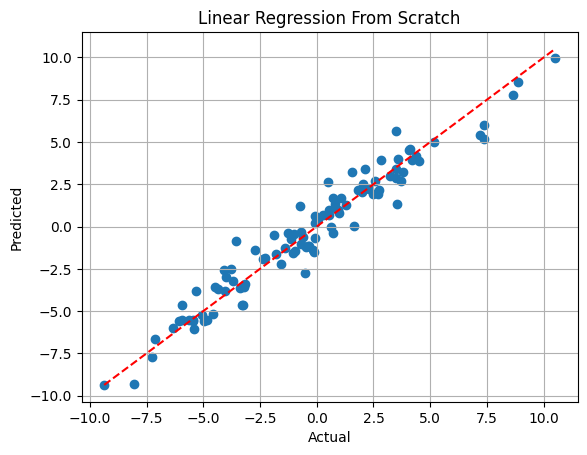

In [1]:
# Simulated linear data
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
n = 100
X = np.random.randn(n, 2)  # Two features
true_beta = np.array([3.0, -2.0])
y = X @ true_beta + np.random.normal(0, 1, n)

# Add intercept
X_with_bias = np.c_[np.ones(n), X]

# Closed-form OLS solution
beta_hat = np.linalg.inv(X_with_bias.T @ X_with_bias) @ X_with_bias.T @ y
print("Estimated coefficients:", beta_hat)

# Predictions
y_pred = X_with_bias @ beta_hat

# Plot predicted vs actual
plt.scatter(y, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Linear Regression From Scratch")
plt.plot([min(y), max(y)], [min(y), max(y)], 'r--')
plt.grid(True)
plt.show()


In [2]:
# Using scikit-learn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X, y)

print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)
print("R^2:", r2_score(y, model.predict(X)))
print("MSE:", mean_squared_error(y, model.predict(X)))


Intercept: -0.05141112518872587
Coefficients: [ 3.1104649 -2.0540371]
R^2: 0.9431757673307737
MSE: 0.890254116983695


## 9. Regularization: Stabilizing Linear Regression

Regularization adds a penalty term to the loss function to shrink or constrain coefficients, improving **generalization** and reducing **overfitting** or **multicollinearity sensitivity**.

---

### 1. Ridge Regression (L2)
Adds squared norm penalty:
$$
\min_\beta \| y - X \beta \|^2 + \lambda \| \beta \|_2^2
$$

- Shrinks all coefficients toward 0, but none exactly to 0
- Helps with multicollinearity and ill-conditioning
- Closed-form: $\beta = (X^\top X + \lambda I)^{-1} X^\top y$

---

### 2. Lasso Regression (L1)
Adds absolute norm penalty:
$$
\min_\beta \| y - X \beta \|^2 + \lambda \| \beta \|_1
$$

- Encourages sparsity (can zero out some coefficients)
- Feature selection + shrinkage

---

### 3. ElasticNet
Combines both L1 and L2:
$$
\min_\beta \| y - X \beta \|^2 + \lambda_1 \| \beta \|_1 + \lambda_2 \| \beta \|_2^2
$$

- Handles correlated features better than Lasso
- Balances sparsity and stability

---


In [3]:
# Ridge, Lasso, ElasticNet using sklearn
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import cross_val_score

# Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(X, y)
print("Ridge Coef:", ridge.coef_)

# Lasso
lasso = Lasso(alpha=0.1)
lasso.fit(X, y)
print("Lasso Coef:", lasso.coef_)

# ElasticNet
enet = ElasticNet(alpha=0.1, l1_ratio=0.7)
enet.fit(X, y)
print("ElasticNet Coef:", enet.coef_)


Ridge Coef: [ 3.08141451 -2.03501724]
Lasso Coef: [ 3.01697447 -1.95938452]
ElasticNet Coef: [ 2.96125361 -1.93358789]
